# Cost-Sensitive Logistic Regression:

Counter({0: 9900, 1: 100})


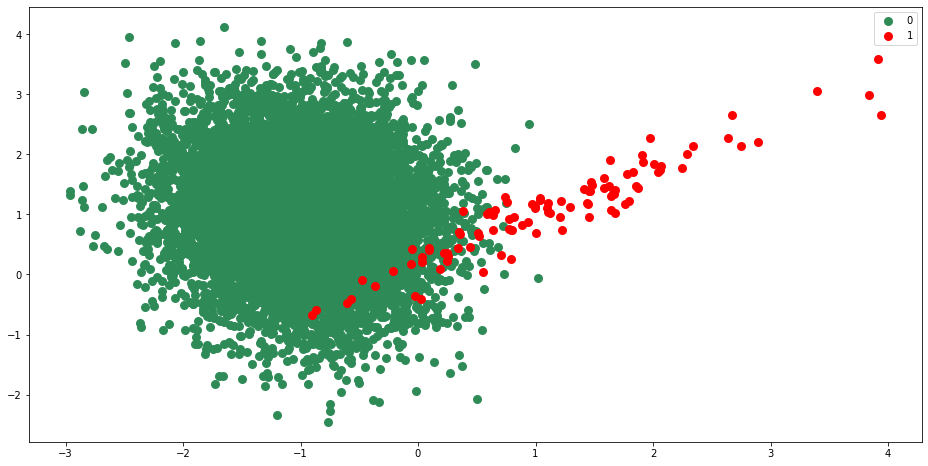

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold 
from sklearn.linear_model import LogisticRegression
import itertools
colors = itertools.cycle(["seagreen", "red"])
plt.figure(figsize=(16,8))

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]    
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), color=next(colors), linewidth=3.0)
plt.legend()
plt.show()

## Weighted Logistic Regression with Scikit-Learn:

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

weights = {0:0.01, 1:1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.989


The scikit-learn library provides an implementation of the best practice heuristic for the
class weighting. It is implemented via the compute class weight().

In [1]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

[ 0.50505051 50.        ]


C:\Users\talk2_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0, 1], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

model = LogisticRegression(solver='lbfgs')

balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,scoring='roc_auc')

grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (np.mean, stdev, param))

## Grid search Weighted Logistic Regression:

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

model = LogisticRegression(solver='lbfgs')

balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

# Cost-Sensitive Decision Trees:

## Simply using Decsision Tree:

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.742


## Grid search Weighted Decision Tree:

In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)

model = DecisionTreeClassifier()

balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.754226 using {'class_weight': {0: 1, 1: 10}}
0.737172 (0.077792) with: {'class_weight': {0: 100, 1: 1}}
0.732323 (0.068359) with: {'class_weight': {0: 10, 1: 1}}
0.744024 (0.070397) with: {'class_weight': {0: 1, 1: 1}}
0.754226 (0.074889) with: {'class_weight': {0: 1, 1: 10}}
0.744478 (0.079499) with: {'class_weight': {0: 1, 1: 100}}


# Cost-Sensitive Support Vector Machines:

## Simply applying SVM:

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.808


## Weighted SVM:

In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale', class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.967


## Grid Search Weighted SVM:

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

model = SVC(gamma='scale')

balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}
0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}


# Cost-Sensitive Deep Learning in Keras:

## Simply applying neural network:

In [11]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

def prepare_data():

    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)    
    n_train = 5000
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

def define_model(n_input):

    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

trainX, trainy, testX, testy = prepare_data()

n_input = trainX.shape[1]
model = define_model(n_input)

model.fit(trainX, trainy, epochs=100, verbose=0)

yhat = model.predict(testX)

score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.936


## Weighted Neural Network With Keras:

In [12]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

def prepare_data():    
    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
    
    n_train = 5000
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

def define_model(n_input):

    model = Sequential()

    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

trainX, trainy, testX, testy = prepare_data()

n_input = trainX.shape[1]
model = define_model(n_input)

weights = {0:1, 1:100}
history = model.fit(trainX, trainy, class_weight=weights, epochs=100, verbose=0)

yhat = model.predict(testX)
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.969


# Cost-Sensitive Gradient Boosting with XGBoost:

## Simlpy applying XGBoost:

In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from xgboost import XGBClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

model = XGBClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.96052


## Weighted XGBoost for Class Imbalance:

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from xgboost import XGBClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

model = XGBClassifier(scale_pos_weight=99)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.95469


## Tune the Class Weighting Hyperparameter:

In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

model = XGBClassifier()

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\talk2_000\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.960522 using {'scale_pos_weight': 1}
0.960522 (0.024031) with: {'scale_pos_weight': 1}
0.956106 (0.029382) with: {'scale_pos_weight': 10}
0.955189 (0.029265) with: {'scale_pos_weight': 25}
0.952980 (0.028971) with: {'scale_pos_weight': 50}
0.951190 (0.031723) with: {'scale_pos_weight': 75}
0.954692 (0.027654) with: {'scale_pos_weight': 99}
0.953470 (0.028217) with: {'scale_pos_weight': 100}
0.947552 (0.029872) with: {'scale_pos_weight': 1000}
